In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from ipywidgets import interactive, fixed

%matplotlib inline

In [2]:
def plot_interactive(w, b, func, ylim=fixed((0, 1)), show_der=False):
    plt.figure(0)
    
    x = np.linspace(-10, 10, num=1000)
    z = w*x + b
    y = func(z)
    
    plt.plot(x, y, color='blue')
    if show_der:
        der = func(z, derivative=True)
        y_der_z = der
        y_der_x = w*der
        plt.plot(x, y_der_z, color='red')
        plt.plot(x, y_der_x, color='green')
    plt.xlim(-10, 10)
    plt.ylim(ylim[0], ylim[1])
    plt.show()

### Linear

![Captura de tela de 2024-09-23 14-10-50.png](<attachment:Captura de tela de 2024-09-23 14-10-50.png>)
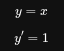

In [3]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

In [4]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(linear), ylim=fixed((-10, 10)))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Sigmoid

![Captura de tela de 2024-09-23 14-10-58.png](<attachment:Captura de tela de 2024-09-23 14-10-58.png>)
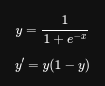

In [8]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y * (1 - y)
    return 1.0 / (1.0 + np.exp(-x))

In [9]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(sigmoid))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Tanh (tangent hyperbolic)

![Captura de tela de 2024-09-23 14-11-47.png](<attachment:Captura de tela de 2024-09-23 14-11-47.png>)
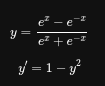

In [10]:
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [11]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(tanh), ylim=fixed((-2, 2)))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Rectified Linear Unit (ReLU)

![Captura de tela de 2024-09-23 14-12-48.png](<attachment:Captura de tela de 2024-09-23 14-12-48.png>)

Obs.: Lembrando que a derivada da ReLU quando x = 0 não existe matematicamente, mas é convencionalmente definida como 0.
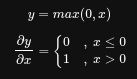

In [12]:
def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

In [13]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(relu), ylim=fixed((-1, 10)))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Leaky ReLU

![Captura de tela de 2024-09-23 14-12-54.png](<attachment:Captura de tela de 2024-09-23 14-12-54.png>)
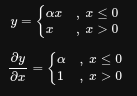

In [16]:
def leaky_relu(x, derivative=False):
    alpha = 0.1
    if derivative:
        return np.where(x <= 0, alpha, 1)
    return np.where(x <= 0, alpha*x, x)
    

In [17]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(leaky_relu), ylim=fixed((-1, 10)))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Exponential Linear Unit (eLU)

![Captura de tela de 2024-09-23 14-13-04.png](<attachment:Captura de tela de 2024-09-23 14-13-04.png>)
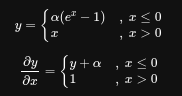

In [20]:
def elu(x, derivative=False):
    alpha = 1.0
    if derivative:
        y = elu(x)
        return np.where(x <= 0, y + alpha, 1)
    return np.where(x <= 0, alpha * (np.exp(x) -1), x)

In [21]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(elu), ylim=fixed((-2, 10)))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Principais funções de ativação

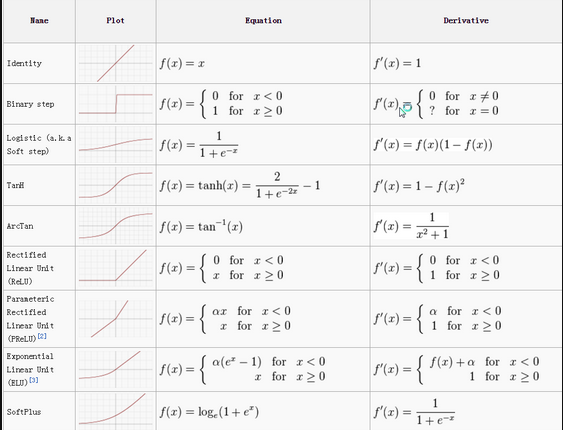